In [1]:
# Import the necessary packages
import os

# For calculating
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#for modeling
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
import math
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
X_train = pd.read_csv("../data/X_train_wodum.csv")
y_train = pd.read_csv("../data/y_train_wodum.csv")
X_test = pd.read_csv("../data/X_test_wodum.csv")
y_test = pd.read_csv("../data/y_test_wodum.csv")

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74943 entries, 0 to 74942
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ac               74943 non-null  object 
 1   s_std_day_year   74943 non-null  float64
 2   c_std_day_year   74943 non-null  float64
 3   std_day          74943 non-null  object 
 4   sta_day          74943 non-null  object 
 5   std_month        74943 non-null  object 
 6   sta_month        74943 non-null  object 
 7   s_std_time_dec   74943 non-null  float64
 8   c_std_time_dec   74943 non-null  float64
 9   iso_country_dep  74943 non-null  object 
 10  type_dep         74943 non-null  object 
 11  iso_country_arr  74943 non-null  object 
 12  type_arr         74943 non-null  object 
 13  is_same_country  74943 non-null  bool   
dtypes: bool(1), float64(4), object(9)
memory usage: 7.5+ MB


In [4]:
X_train.head()

,ac,s_std_day_year,c_std_day_year,std_day,sta_day,std_month,sta_month,s_std_time_dec,c_std_time_dec,iso_country_dep,type_dep,iso_country_arr,type_arr,is_same_country
0,TU 32AIMN,0.746972,0.664855,Sunday,Sunday,February,February,0.156434,-0.987688,BE,large_airport,TN,large_airport,False
1,TU 736IOR,0.835925,-0.548843,Friday,Friday,May,May,-0.998630,0.052336,FR,medium_airport,TN,medium_airport,False
2,TU 32AIMG,0.471160,-0.882048,Saturday,Saturday,June,June,-0.453990,-0.891007,FR,large_airport,TN,large_airport,False
3,TU 31AIMJ,0.463550,0.886071,Saturday,Saturday,January,January,0.649448,-0.760406,DE,large_airport,TN,medium_airport,False
4,TU 736IOR,-0.845249,-0.534373,Wednesday,Wednesday,August,August,0.500000,-0.866025,SI,large_airport,TN,medium_airport,False


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74943 entries, 0 to 74942
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ac               74943 non-null  object 
 1   s_std_day_year   74943 non-null  float64
 2   c_std_day_year   74943 non-null  float64
 3   std_day          74943 non-null  object 
 4   sta_day          74943 non-null  object 
 5   std_month        74943 non-null  object 
 6   sta_month        74943 non-null  object 
 7   s_std_time_dec   74943 non-null  float64
 8   c_std_time_dec   74943 non-null  float64
 9   iso_country_dep  74943 non-null  object 
 10  type_dep         74943 non-null  object 
 11  iso_country_arr  74943 non-null  object 
 12  type_arr         74943 non-null  object 
 13  is_same_country  74943 non-null  bool   
dtypes: bool(1), float64(4), object(9)
memory usage: 7.5+ MB


### CatBoost with default parameters

In [6]:
# # Initialize the CatBoostRegressor with indices
# model = CatBoostRegressor(learning_rate=0.1, l2_leaf_reg=1, iterations=500, depth=10, verbose=0)

# # Fit the model
# model.fit(X_train, y_train)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74943 entries, 0 to 74942
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ac               74943 non-null  object 
 1   s_std_day_year   74943 non-null  float64
 2   c_std_day_year   74943 non-null  float64
 3   std_day          74943 non-null  object 
 4   sta_day          74943 non-null  object 
 5   std_month        74943 non-null  object 
 6   sta_month        74943 non-null  object 
 7   s_std_time_dec   74943 non-null  float64
 8   c_std_time_dec   74943 non-null  float64
 9   iso_country_dep  74943 non-null  object 
 10  type_dep         74943 non-null  object 
 11  iso_country_arr  74943 non-null  object 
 12  type_arr         74943 non-null  object 
 13  is_same_country  74943 non-null  bool   
dtypes: bool(1), float64(4), object(9)
memory usage: 7.5+ MB


In [8]:
#for y_test without dummies

cat_features_indices = [X_train.columns.get_loc(col) for col in [
    'std_day', 'sta_day', 'std_month', 'sta_month',
    'iso_country_dep', 'type_dep',
    'iso_country_arr', 'type_arr', 'is_same_country', 'ac'
]]

# Initialize the CatBoostRegressor with indices
model = CatBoostRegressor(cat_features=cat_features_indices, learning_rate=0.1, l2_leaf_reg=1, iterations=500, depth=10, verbose=0, random_seed=42)

# Fit the model
model.fit(X_train, y_train)

In [9]:
# Get feature importance
feature_importance = model.get_feature_importance()

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df.head(20))

            Feature  Importance
0                ac   14.715693
2    c_std_day_year   13.437830
1    s_std_day_year   12.466682
8    c_std_time_dec    9.135364
7    s_std_time_dec    9.032065
9   iso_country_dep    6.248558
3           std_day    6.204568
4           sta_day    5.917983
5         std_month    4.960271
11  iso_country_arr    4.565286
6         sta_month    4.324209
10         type_dep    4.080160
12         type_arr    4.040080
13  is_same_country    0.871252


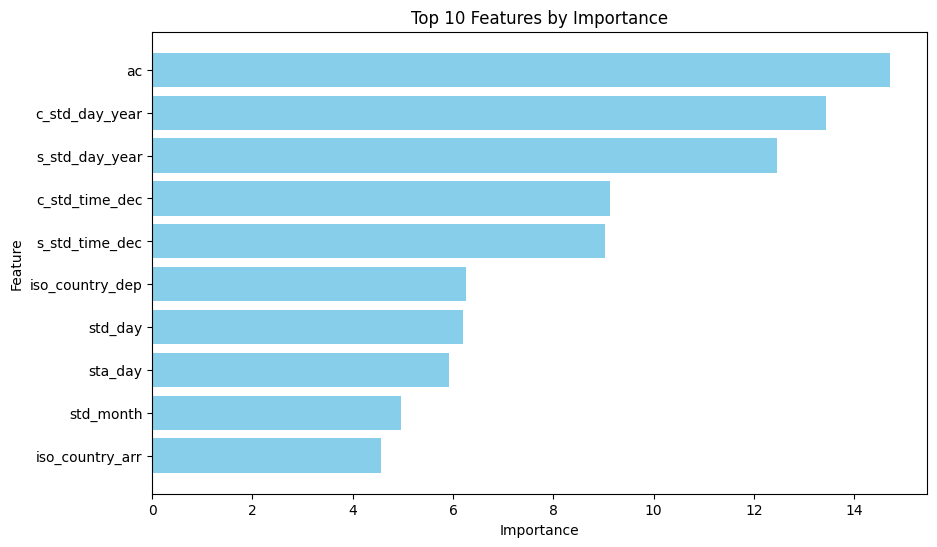

In [10]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Extract the top 10 features
top_10_features = feature_importance_df.head(10)

# Create a bar plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features by Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [11]:
# Make predictions
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [12]:
# # retransform np.log1p transformed y_test

# y_pred_test = np.expm1(y_pred_test)

# y_pred_train = np.expm1(y_pred_train)
# y_train = np.expm1(y_train) 

In [13]:
# Evaluate the model on training set
mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2: {r2}')

Mean Squared Error: 10885.69098900258
Mean Absolute Error: 49.902529913722546
R^2: 0.28139615383827243


In [14]:
# Evaluate the model on test set
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
rmse = math.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2: {r2}')

Mean Squared Error: 13723.093697890758
Mean Absolute Error: 54.18574616684131
Root Mean Squared Error: 117.14560895693342
R^2: 0.10738564166607167


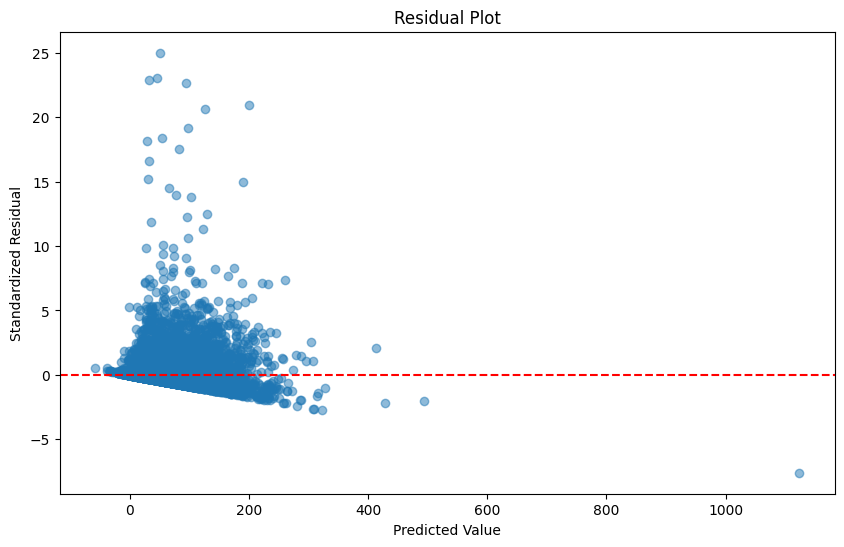

In [15]:
# Calculate residuals
residuals = y_test.values.flatten() - y_pred_test

# Standardize residuals
standardized_residuals = residuals / np.std(residuals)

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, standardized_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Standardized Residual')
plt.title('Residual Plot')
plt.show()

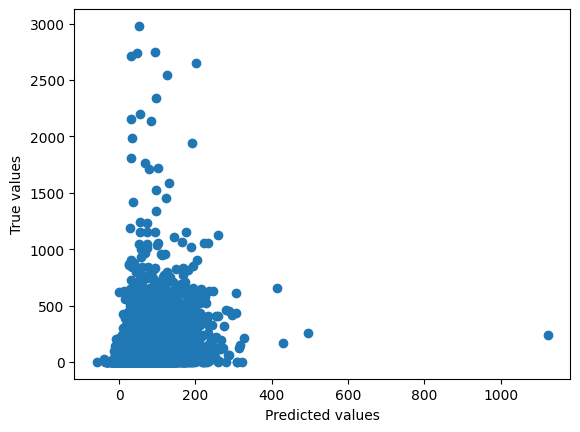

In [16]:
plt.scatter(y_pred_test, y_test) 
plt.ylabel("True values")
plt.xlabel("Predicted values")
plt.show()

### hurdle method?

### CatBoost with Grid Search

In [17]:
# # Define the parameter grid for RandomizedSearchCV
# param_grid = {
#     'iterations': [100, 200, 300, 400, 500],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#     'depth': [4, 6, 8, 10],
#     'l2_leaf_reg': [1, 3, 5, 7, 9]
# }

# # Initialize the CatBoostRegressor
# model_rand = CatBoostRegressor(random_seed=42)

# # Create a scorer for Mean Squared Error
# mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# # Initialize RandomizedSearchCV with MSE scorer
# random_search = RandomizedSearchCV(
#     estimator=model_rand,
#     param_distributions=param_grid,  # Note: Use param_distributions here
#     n_iter=50,  # Number of random parameter combinations to try
#     scoring=mse_scorer,
#     cv=5,  # 5-fold cross-validation
#     verbose=1,
#     return_train_score=True  # To get training scores
# )

In [18]:
# # Fit RandomizedSearchCV
# random_search.fit(X_train, y_train)

In [19]:
# # Get the best parameters and best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# # Display the results of cross-validation
# print("Best Parameters:", best_params)
# print("Best Score (Validation MSE):", best_score)

Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 10}
Best Score (Validation MSE): -2.6230855530637895

In [20]:
# # Display cross-validation results
# cv_results = random_search.cv_results_

# for i in range(len(cv_results['mean_test_score'])):
#     print(f"Parameter Set {i+1}: {cv_results['params'][i]}")
#     print(f"Mean Test Score (MSE): {cv_results['mean_test_score'][i]}")
#     print(f"Mean Train Score (MSE): {cv_results['mean_train_score'][i]}")
#     print(f"Std Dev Test Score (MSE): {cv_results['std_test_score'][i]}")
#     print(f"Std Dev Train Score (MSE): {cv_results['std_train_score'][i]}\n")

In [21]:
# # Use the best model for predictions
# best_model = random_search.best_estimator_

In [22]:
# # Get feature importance
# feature_importance = best_model.get_feature_importance()

# # Create a DataFrame for better visualization
# feature_importance_df = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': feature_importance
# })

# # Sort the DataFrame by importance
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Display the feature importance
# print(feature_importance_df.head(20))

In [23]:
# # Make predictions
# y_pred_test = best_model.predict(X_test)
# y_pred_train = best_model.predict(X_train)

In [24]:
# # Evaluate the model on training set
# mse = mean_squared_error(y_train, y_pred_train)
# mae = mean_absolute_error(y_train, y_pred_train)
# r2 = r2_score(y_train, y_pred_train)

# print(f'Mean Squared Error: {mse}')
# print(f'Mean Absolute Error: {mae}')
# print(f'R^2: {r2}')

In [25]:
# # Evaluate the model on test set
# mse = mean_squared_error(y_test, y_pred_test)
# mae = mean_absolute_error(y_test, y_pred_test)
# r2 = r2_score(y_test, y_pred_test)

# print(f'Mean Squared Error: {mse}')
# print(f'Mean Absolute Error: {mae}')
# print(f'R^2: {r2}')

In [26]:
# # Calculate residuals
# residuals = y_test.values.flatten() - y_pred_test

# # Standardize residuals
# standardized_residuals = residuals / np.std(residuals)

# # Create a residual plot
# plt.figure(figsize=(10, 6))
# plt.scatter(y_pred_test, standardized_residuals, alpha=0.5)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel('Predicted Value')
# plt.ylabel('Standardized Residual')
# plt.title('Residual Plot')
# plt.show()

In [27]:
# plt.scatter(y_pred_test, y_test) 
# plt.ylabel("True values")
# plt.xlabel("Predicted values")
# plt.show()